In [ ]:
#Importando las librerias
import pandas as pd
import numpy as np



# Limpieza Datos

In [ ]:
#Puedes cargar a colab directamente del lado izquierdo, tener en cuenta que cada que cargues se eliminará y tendrás que volver a cargarlo
#O puedes usar esto:
#Otra opción para cargar archivos a la sesión de Collab
from google.colab import files
uploaded = files.upload()

In [ ]:
#Conectar a Google Drive el documento
#Deberás autenticarte y meter el código en de autorización, muy útil cuando tienes los datasets en tu drive y/o han sido compartidos por ahí
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando Dataset

data_frame_liquors = pd.read_csv('/content/drive/MyDrive/Databases/Week 9 - Wednesday/database_liquors.csv')

In [ ]:
#Info permite ver que tipo de dato es cada columna, nombre de columna y número de columnas
data_frame_liquors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434260 entries, 0 to 434259
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   invoice              434260 non-null  object 
 1   date                 434260 non-null  object 
 2   store_number         434260 non-null  int64  
 3   store_name           434260 non-null  object 
 4   address              434260 non-null  object 
 5   city                 434260 non-null  object 
 6   zip_code             434260 non-null  int64  
 7   store_location       434260 non-null  object 
 8   county_number        434260 non-null  int64  
 9   county               434260 non-null  object 
 10  category             434260 non-null  int64  
 11  category_name        434260 non-null  object 
 12  vendor_number        434260 non-null  int64  
 13  vendor_name          434260 non-null  object 
 14  item_number          434260 non-null  int64  
 15  item_description 

In [ ]:
#revisando que tienen los datos
#Es bueno para que te des una idea de con qué peudes estar lideando y empieces a ligar todas las variables
data_frame_liquors.head()

,invoice,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons
0,INV-22970800091,11/01/2019,2569,Hy-Vee Food Store #2 / Cedar Rapids,279 Collins Road NE,Cedar Rapids,52402,POINT (-91.630677 42.027805),57,LINN,1062500,Flavored Rum,370,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1.75,16.99,25.49,1.0,25.49,1.75,0.46
1,INV-22958000044,11/01/2019,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,1062200,White Rum,434,LUXCO INC,45278,Paramount White Rum,6,1.75,7.84,11.76,6.0,70.56,10.50,2.77
2,INV-22975400022,11/01/2019,5857,EZ Stop II - Dubuque,700 Rhomberg Avenue,Dubuque,52001,POINT (-90.663494 42.515732),31,DUBUQUE,1031100,American Vodkas,255,Infinium Spirits,37886,Seagrams Extra Smooth Vodka,12,750.00,5.38,8.07,2.0,16.14,1.50,0.39
3,INV-22976000009,11/01/2019,3782,Bender Foods / Guttenberg,619 S Hwy 52,Guttenberg,52052,POINT (-91.100489 42.77964),22,CLAYTON,1012100,Canadian Whiskies,85,Brown Forman Corp.,12467,Canadian Mist Whisky,12,1.00,7.22,10.83,3.0,32.49,3.00,0.79
4,INV-22951100010,11/01/2019,4678,Fareway Stores #124 / Adel,804 Nile Kinnick Dr,Adel,50003,POINT (-94.01679600000001 41.61025),25,DALLAS,1012100,Canadian Whiskies,55,SAZERAC NORTH AMERICA,12408,Canadian Ltd Whisky,6,1.75,8.14,12.21,6.0,82.26,10.50,2.77


In [ ]:
# Muestra cuantos rengoles tiene el data_frame
len(data_frame_liquors)

434260

In [ ]:
#Modificando columnas, quitando mayusculas, remplazando espacios por guión bajo
#buena practica ya que al momento de que estes haciendo coding será más facil que sepas que todos tienen un mismo formato y no estes buscando como viene
data_frame_liquors = data_frame_liquors.rename(columns={'invoice':'invoice_id'})

In [ ]:
data_frame_liquors.head()

,invoice_id,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons
0,INV-22970800091,11/01/2019,2569,Hy-Vee Food Store #2 / Cedar Rapids,279 Collins Road NE,Cedar Rapids,52402,POINT (-91.630677 42.027805),57,LINN,1062500,Flavored Rum,370,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1.75,16.99,25.49,1.0,25.49,1.75,0.46
1,INV-22958000044,11/01/2019,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,1062200,White Rum,434,LUXCO INC,45278,Paramount White Rum,6,1.75,7.84,11.76,6.0,70.56,10.50,2.77
2,INV-22975400022,11/01/2019,5857,EZ Stop II - Dubuque,700 Rhomberg Avenue,Dubuque,52001,POINT (-90.663494 42.515732),31,DUBUQUE,1031100,American Vodkas,255,Infinium Spirits,37886,Seagrams Extra Smooth Vodka,12,750.00,5.38,8.07,2.0,16.14,1.50,0.39
3,INV-22976000009,11/01/2019,3782,Bender Foods / Guttenberg,619 S Hwy 52,Guttenberg,52052,POINT (-91.100489 42.77964),22,CLAYTON,1012100,Canadian Whiskies,85,Brown Forman Corp.,12467,Canadian Mist Whisky,12,1.00,7.22,10.83,3.0,32.49,3.00,0.79
4,INV-22951100010,11/01/2019,4678,Fareway Stores #124 / Adel,804 Nile Kinnick Dr,Adel,50003,POINT (-94.01679600000001 41.61025),25,DALLAS,1012100,Canadian Whiskies,55,SAZERAC NORTH AMERICA,12408,Canadian Ltd Whisky,6,1.75,8.14,12.21,6.0,82.26,10.50,2.77


In [ ]:
#pasando a upper para test
data_frame_liquors.columns = [x.upper() for x in data_frame_liquors.columns]

In [ ]:
#revisando
data_frame_liquors.columns

Index(['INVOICE_ID', 'DATE', 'STORE_NUMBER', 'STORE_NAME', 'ADDRESS', 'CITY',
       'ZIP_CODE', 'STORE_LOCATION', 'COUNTY_NUMBER', 'COUNTY', 'CATEGORY',
       'CATEGORY_NAME', 'VENDOR_NUMBER', 'VENDOR_NAME', 'ITEM_NUMBER',
       'ITEM_DESCRIPTION', 'PACK', 'BOTTLE_VOLUME', 'STATE_BOTTLE_COST',
       'STATE_BOTTLE_RETAIL', 'BOTTLES_SOLD', 'SALE_USD', 'VOLUME_SOLD_LT',
       'VOLUME_SOLD_GALLONS'],
      dtype='object')

In [ ]:
#regresando a lower
data_frame_liquors.columns = [x.lower() for x in data_frame_liquors.columns]

In [ ]:
#Validamos que nuestra fecha no es de tipo date time, entonces si queremos hacer nuestro análisis por mes
#deberemos pasarlo a datetime para aque sea más sencillo manipularla
data_frame_liquors['date'].dtypes

dtype('O')

In [ ]:
#cambiamos la fecha de string a date para nuestro análisis
data_frame_liquors['date']= pd.to_datetime(data_frame_liquors['date'])

In [ ]:
data_frame_liquors['date'].dtypes

dtype('<M8[ns]')

In [ ]:
 #Verificando que neustro datetype es igual a un datetime, solo con otro formato
 #Más info aquí https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns
 np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [ ]:
#Manera de obtener el mes únicamente de la fecha
#Aquí tener cuidado de usar ya que puede repetirse el año
data_frame_liquors['date_mes']= data_frame_liquors['date'].dt.month

In [ ]:
#manera de truncar a primer dia del año, la fecha tiene que ser si o si un timestamp
#Otras manera de cambiarlo aquí:
#https://stackoverflow.com/questions/45304531/extracting-the-first-day-of-month-of-a-datetime-type-column-in-pandas
data_frame_liquors['date_mes_truncate']=data_frame_liquors['date'].values.astype('datetime64[M]')

In [ ]:
data_frame_liquors.to_csv('data_frame_liquors_2.csv',index=False)

In [ ]:
#Validando la columna creada
data_frame_liquors['date_mes_truncate'].dtypes

dtype('<M8[ns]')

In [ ]:
#No hay datos nulos
#No significa que toda la info este bien, este análisis ya va más de fondo esto para validar que todo este ok.
df_nulo = data_frame_liquors.isnull().sum()
df_nulo[df_nulo > 0]

Series([], dtype: int64)

# HASTA AQUI YA TENEMOS UN DATASET QUE PODREMOS EMPEZAR A MANIPULAR,

In [ ]:
#Revisamos por categoría, valores únicos
data_frame_liquors['category_name'].unique().tolist() 


['Flavored Rum',
 'White Rum',
 'American Vodkas',
 'Canadian Whiskies',
 'American Cordials & Liqueur',
 'Whiskey Liqueur',
 'Straight Bourbon Whiskies',
 'Blended Whiskies',
 'Tennessee Whiskies',
 'Imported Vodkas',
 'Spiced Rum',
 'Temporary & Specialty Packages',
 'American Schnapps',
 'Cocktails /RTD',
 'Mixto Tequila',
 'Aged Dark Rum',
 'Imported Flavored Vodka',
 'Coffee Liqueurs',
 'American Flavored Vodka',
 'American Dry Gins',
 'Scotch Whiskies',
 'Triple Sec',
 'Cream Liqueurs',
 'Imported Brandies',
 'Imported Cordials & Liqueurs',
 'American Brandies',
 'Irish Whiskies',
 '100% Agave Tequila',
 'Imported Schnapps',
 'Gold Rum',
 'Neutral Grain Spirits',
 'Special Order Items',
 'Imported Dry Gins',
 'Single Malt Scotch',
 'Corn Whiskies',
 'Straight Rye Whiskies',
 'Single Barrel Bourbon Whiskies',
 'Neutral Grain Spirits Flavored',
 'Imported Distilled Spirit Specialty',
 'Bottled in Bond Bourbon',
 'Mezcal',
 'Temporary &  Specialty Packages',
 '0',
 'Flavored Gin',
 

In [ ]:
#filtrar el dataframe por una categoría en especifico
#se puede obtener de dos maneras
#tenrt mucho cuidado al usar los igual en la segunda manera ya que si dejan uno solo va a sobrescribir todo.
#Query es como si fuera un Where en SQL, no se puede seleccionar una sola columna ahí porqué es serie y serie no permite usarlo

# data_frame_liquors.query('category_name =="Spiced Rum"')
data_frame_liquors[data_frame_liquors['category_name']=="Spiced Rum"]


,invoice_id,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons,date_mes,date_mes_truncate
17,INV-22963900002,2019-11-01,3710,New York Dollar Store,219 Main St,Columbus Junction,52738,POINT (-91.360496 41.279559),58,LOUISA,1062400,Spiced Rum,260,DIAGEO AMERICAS,43333,Captain Morgan Original Spiced PET,48,200.00,2.75,4.13,96.0,396.48,19.20,5.07,11,2019-11-01
35,INV-22981200065,2019-11-01,3818,Round Window Liquor,703 W Pleasant St,Knoxville,50138,POINT (-93.10564100000002 41.320746),63,MARION,1062400,Spiced Rum,260,DIAGEO AMERICAS,43338,Captain Morgan Original Spiced,6,1.75,18.00,27.00,2.0,54.00,3.50,0.92,11,2019-11-01
54,INV-22949300004,2019-11-01,5384,Casey's General Store # 2698/ Perry,1308 1st Street,Perry,50220,POINT (-94.196008 41.595366),25,DALLAS,1062400,Spiced Rum,260,DIAGEO AMERICAS,43338,Captain Morgan Original Spiced,6,1.75,18.00,27.00,3.0,81.00,5.25,1.38,11,2019-11-01
86,INV-22958200021,2019-11-01,5371,State Food Mart,3715 State St.,Bettendorf,52722,POINT (-90.482018 41.528972),82,SCOTT,1062400,Spiced Rum,434,LUXCO INC,44660,Lady Bligh Spiced Rum,12,750.00,5.00,7.50,12.0,90.00,9.00,2.37,11,2019-11-01
91,INV-22980100002,2019-11-01,4027,Wal-Mart 1621 / Centerville,23148 Hwy 5,Centerville,52544,POINT (-92.867849 40.70856),4,APPANOOSE,1062400,Spiced Rum,259,Heaven Hill Brands,43028,Admiral Nelson Spiced Rum,6,1.75,11.55,17.33,6.0,103.98,10.50,2.77,11,2019-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434186,INV-24264600013,2019-12-31,2544,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158,POINT (-92.912817 42.039205),64,MARSHALL,1062400,Spiced Rum,434,LUXCO INC,44658,Lady Bligh Spiced Rum,6,1.75,10.00,15.00,12.0,180.00,21.00,5.54,12,2019-12-01
434211,INV-24268700015,2019-12-31,5599,Kwik Stop 4,515 Broadway St,Waterloo,50703,POINT (-92.345106 42.510792),7,BLACK HAWK,1062400,Spiced Rum,260,DIAGEO AMERICAS,43337,Captain Morgan Original Spiced,12,1.00,11.75,17.63,4.0,70.52,4.00,1.05,12,2019-12-01
434225,INV-24271200022,2019-12-31,5244,The Ox & Wren Spirits and Gifts,708 2nd AVE SE,Cresco,52136,POINT (-92.106529 43.371131),45,HOWARD,1062400,Spiced Rum,260,DIAGEO AMERICAS,43285,Captain Morgan Original Spiced PET,12,750.00,9.06,13.59,12.0,163.08,9.00,2.37,12,2019-12-01
434238,INV-24264000136,2019-12-31,2666,Hy-Vee Food Store #2 / State Ankeny,2510 SW State St,Ankeny,50023,POINT (-93.621824 41.705188),77,POLK,1062400,Spiced Rum,260,DIAGEO AMERICAS,43331,Captain Morgan Original Spiced Mini,12,50.00,4.80,7.20,2.0,14.40,0.10,0.02,12,2019-12-01


In [ ]:
#De esta manera obteneremos todos los mezcales que estan en nuestro dataset

data_frame_liquors['item_description'][data_frame_liquors['category_name']=="Spiced Rum"].unique().tolist()

['Captain Morgan Original Spiced PET',
 'Captain Morgan Original Spiced',
 'Lady Bligh Spiced Rum',
 'Admiral Nelson Spiced Rum',
 'Admiral Nelson Spiced Rum PET',
 'Captain Morgan Original Spiced Mini',
 'Captain Morgan Original Spiced Barrel',
 'Trader Vics Private Selection Spiced Rum',
 'Kraken Black Spiced Rum',
 'Blue Ox Spiced Rum',
 'Caliber Spiced Rum',
 'Sailor Jerry Spiced Navy Rum',
 'Captain Morgan Black Spiced',
 'Captain Morgan 100prf Spiced Rum',
 'Admiral Nelson Spiced 101',
 'Rondiaz Rum Spiced',
 'Captain Morgan Private Stock',
 'Admiral Nelson Spiced Rum Mini',
 'Bacardi Oakheart',
 'Kraken Black Spiced Rum 70prf',
 'Blackheart Premium Spiced Rum',
 'Blue Chair Bay Spiced Rum',
 'Kraken Black Spiced 70prf',
 'Holy Hell',
 'Calypso Spiced Rum',
 'Wisconsin Club Spiced Rum',
 'Leadslingers Black Flag Spiced Rum',
 'Blue Ox Spiced Rum Mini',
 'Kirkland Signature Original Spiced Rum',
 'Paradise White Sand']

In [ ]:
#creando un mini df para descargar y validar calculo
# recomiendo para estar siempre 100% seguros de que lo que vamos analizando va bien
corp_test = data_frame_liquors.query('item_description =="Bacardi Oakheart"')

In [ ]:
#descarga del csv
corp_test.to_csv('rum_subset.csv',index=False)

# Ya tenemos el dataset de validación, ahora podemos iniciar a modificar el df

In [ ]:
data_frame_liquors.head()

,invoice_id,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons,date_mes,date_mes_truncate
0,INV-22970800091,2019-11-01,2569,Hy-Vee Food Store #2 / Cedar Rapids,279 Collins Road NE,Cedar Rapids,52402,POINT (-91.630677 42.027805),57,LINN,1062500,Flavored Rum,370,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1.75,16.99,25.49,1.0,25.49,1.75,0.46,11,2019-11-01
1,INV-22958000044,2019-11-01,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,1062200,White Rum,434,LUXCO INC,45278,Paramount White Rum,6,1.75,7.84,11.76,6.0,70.56,10.50,2.77,11,2019-11-01
2,INV-22975400022,2019-11-01,5857,EZ Stop II - Dubuque,700 Rhomberg Avenue,Dubuque,52001,POINT (-90.663494 42.515732),31,DUBUQUE,1031100,American Vodkas,255,Infinium Spirits,37886,Seagrams Extra Smooth Vodka,12,750.00,5.38,8.07,2.0,16.14,1.50,0.39,11,2019-11-01
3,INV-22976000009,2019-11-01,3782,Bender Foods / Guttenberg,619 S Hwy 52,Guttenberg,52052,POINT (-91.100489 42.77964),22,CLAYTON,1012100,Canadian Whiskies,85,Brown Forman Corp.,12467,Canadian Mist Whisky,12,1.00,7.22,10.83,3.0,32.49,3.00,0.79,11,2019-11-01
4,INV-22951100010,2019-11-01,4678,Fareway Stores #124 / Adel,804 Nile Kinnick Dr,Adel,50003,POINT (-94.01679600000001 41.61025),25,DALLAS,1012100,Canadian Whiskies,55,SAZERAC NORTH AMERICA,12408,Canadian Ltd Whisky,6,1.75,8.14,12.21,6.0,82.26,10.50,2.77,11,2019-11-01


In [ ]:

#se crea una tabla para sumarizar todo, esta table tiene suma de botellas, ventas, agrupado por item, categoría y condado
#se reinicia el indice para fijar posteriorment por item y hacer análisis con ese
df_summarized = data_frame_liquors.groupby(['item_description','category_name','county','date_mes_truncate']).agg({'bottles_sold':'sum','sale_usd':'sum','state_bottle_cost':'mean','state_bottle_retail':'mean'}).reset_index()
#.round(2)


In [ ]:
#validando estructura
df_summarized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86631 entries, 0 to 86630
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   item_description     86631 non-null  object        
 1   category_name        86631 non-null  object        
 2   county               86631 non-null  object        
 3   date_mes_truncate    86631 non-null  datetime64[ns]
 4   bottles_sold         86631 non-null  float64       
 5   sale_usd             86631 non-null  float64       
 6   state_bottle_cost    86631 non-null  float64       
 7   state_bottle_retail  86631 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 5.3+ MB


In [ ]:
#visualizando información para ver si nos hace sentido
df_summarized.head(10)

,item_description,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
0,1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-11-01,3.0,100.86,22.41,33.62
1,1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-12-01,2.0,67.24,22.41,33.62
2,1800 Anejo,100% Agave Tequila,BUENA VIST,2019-11-01,3.0,100.86,22.41,33.62
3,1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62
4,1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62
5,1800 Anejo,100% Agave Tequila,CLAY,2019-11-01,2.0,67.24,22.41,33.62
6,1800 Anejo,100% Agave Tequila,CRAWFORD,2019-11-01,3.0,100.86,22.41,33.62
7,1800 Anejo,100% Agave Tequila,DALLAS,2019-12-01,2.0,67.24,22.41,33.62
8,1800 Anejo,100% Agave Tequila,DUBUQUE,2019-12-01,1.0,33.62,22.41,33.62
9,1800 Anejo,100% Agave Tequila,FLOYD,2019-12-01,3.0,100.86,22.41,33.62


In [ ]:
#fijando nuevo indice
df_summarized = df_summarized.set_index('item_description')
# sort_index() 

In [ ]:
#Guardando información importante de un Dataframe para validar posteriommrente la información

index_df_item = df_summarized.index
colum_df_item = df_summarized.columns
value_df_item =df_summarized.values

In [ ]:
#Ver nuestro indice, en este caso son los nombres de los licores
list(index_df_item.unique())

['1800 Anejo',
 '1800 Coconut',
 '1800 Reposado',
 '1800 Silver',
 '1800 Silver Mini',
 '1800 Silver Tequila w/Replica Shot Glasses',
 '1800 Ultimate Mango Margarita',
 '1800 Ultimate Margarita',
 '1800 Ultimate Peach Margarita',
 '1800 Ultimate Pineapple Margarita',
 '1800 Ultimate Raspberry Margarita',
 '1800 Ultimate Watermelon Margarita',
 '1921 Tequila Anejo',
 '2 Gingers',
 '3-Oaks Distillery Straight Bourbon Whiskey',
 '3-Oaks Distillery Whiskey',
 '360 Double Chocolate',
 '360 Georgia Peach',
 '360 Glazed Donut',
 '360 Huckleberry',
 '360 Red Raspberry',
 '360 Sorrento Lemon Vodka Mini',
 '360 Vodka',
 '360 Vodka Patriot',
 '44 North Huckleberry',
 '99 Apples',
 '99 Apples Mini',
 '99 Bananas',
 '99 Bananas Mini',
 '99 Blackberries',
 '99 Blackberries Mini',
 '99 Butterscotch Mini',
 '99 Cherries Mini',
 '99 Cinnamon',
 '99 Cinnamon Mini',
 '99 Grape',
 '99 Grapes Mini',
 '99 Mangoes',
 '99 Mangoes Mini',
 '99 Oranges',
 '99 Oranges Mini',
 '99 Peaches',
 '99 Peppermint',
 '99 

In [ ]:
#Ver el nombre de las columnas
colum_df_item

Index(['category_name', 'county', 'date_mes_truncate', 'bottles_sold',
       'sale_usd', 'state_bottle_cost', 'state_bottle_retail'],
      dtype='object')

In [ ]:
#Ver los valores
#Numpy ND Array, son arreglos de N-dimensiones de Numpy. Pandas esta construido en su mayoría en Numpu y este tipo de arreglos es el responsable de casi todo el trabajo
value_df_item

array([['100% Agave Tequila', 'BLACK HAWK',
        Timestamp('2019-11-01 00:00:00'), ..., 100.86, 22.41, 33.62],
       ['100% Agave Tequila', 'BLACK HAWK',
        Timestamp('2019-12-01 00:00:00'), ..., 67.24, 22.41, 33.62],
       ['100% Agave Tequila', 'BUENA VIST',
        Timestamp('2019-11-01 00:00:00'), ..., 100.85999999999999, 22.41,
        33.62],
       ...,
       ['American Distilled Spirit Specialty', 'POLK',
        Timestamp('2019-11-01 00:00:00'), ..., 72.0, 16.0, 24.0],
       ['Special Order Items', 'POLK', Timestamp('2019-11-01 00:00:00'),
        ..., 270.0, 15.0, 22.5],
       ['American Distilled Spirit Specialty', 'WARREN',
        Timestamp('2019-11-01 00:00:00'), ..., 417.36, 11.59, 17.39]],
      dtype=object)

In [ ]:
type(value_df_item)
#Numpy ND Array, son arreglos de N-dimensiones de Numpy. Pandas esta construido en su mayoría en Numpu y este tipo de arreglos es el responsable de casi todo el trabajo

numpy.ndarray

In [ ]:
df_summarized.head()

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-12-01,2.0,67.24,22.41,33.62
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62
1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62


In [ ]:
serie_ex = df_summarized['county']
#SERIE

In [ ]:
type(serie_ex)

pandas.core.series.Series

In [ ]:
#De las series, el indice sigue siendo el que tenía el DF, por eso sigue item_description ahí
serie_ex


item_description
1800 Anejo                               BLACK HAWK
1800 Anejo                               BLACK HAWK
1800 Anejo                               BUENA VIST
1800 Anejo                               BUENA VIST
1800 Anejo                               CERRO GORD
                                            ...    
Zaya Gran Reserva Rum w/Ice Ball Tray    WASHINGTON
Ziyad White Rye DISCO                        KEOKUK
Ziyad White Rye DISCO                          POLK
Zyr Vodka                                      POLK
maDIKwe                                      WARREN
Name: county, Length: 86631, dtype: object

# **INDEXING OPERATOR**

In [ ]:
#Single bracket resultará en una Serie
#Double Bracket en un DataFrame
#Al traer mas de una columna y se tiene en corchetes sencillos marcará error porqué no es una serie, es un dataframe
df_summarized['bottles_sold']
df_summarized[['county','date_mes_truncate', 'bottles_sold']]


,county,date_mes_truncate,bottles_sold
item_description,,,
1800 Anejo,BLACK HAWK,2019-11-01,3.0
1800 Anejo,BLACK HAWK,2019-12-01,2.0
1800 Anejo,BUENA VIST,2019-11-01,3.0
1800 Anejo,BUENA VIST,2019-12-01,4.0
1800 Anejo,CERRO GORD,2019-11-01,2.0
...,...,...,...
Zaya Gran Reserva Rum w/Ice Ball Tray,WASHINGTON,2019-11-01,2.0
Ziyad White Rye DISCO,KEOKUK,2019-11-01,2.0
Ziyad White Rye DISCO,POLK,2019-11-01,3.0


In [ ]:
#Orden de las columnas no importa
df_summarized[['bottles_sold','county']]

,bottles_sold,county
item_description,,
1800 Anejo,3.0,BLACK HAWK
1800 Anejo,2.0,BLACK HAWK
1800 Anejo,3.0,BUENA VIST
1800 Anejo,4.0,BUENA VIST
1800 Anejo,2.0,CERRO GORD
...,...,...
Zaya Gran Reserva Rum w/Ice Ball Tray,2.0,WASHINGTON
Ziyad White Rye DISCO,2.0,KEOKUK
Ziyad White Rye DISCO,3.0,POLK


In [ ]:
index_df_item.unique()

Index(['1800 Anejo', '1800 Coconut', '1800 Reposado', '1800 Silver',
       '1800 Silver Mini', '1800 Silver Tequila w/Replica Shot Glasses',
       '1800 Ultimate Mango Margarita', '1800 Ultimate Margarita',
       '1800 Ultimate Peach Margarita', '1800 Ultimate Pineapple Margarita',
       ...
       'Yellowstone Select', 'Yeni Raki', 'Yukon Jack', 'Yukon Jack Jacapple',
       'Yukon Jack Wicked Hot', 'Zaya Gran Reserva Rum',
       'Zaya Gran Reserva Rum w/Ice Ball Tray', 'Ziyad White Rye DISCO',
       'Zyr Vodka', 'maDIKwe'],
      dtype='object', name='item_description', length=2109)

# **.loc()**
.loc is primarily label based. With .loc we perform subsetting using the name of the column


In [ ]:
df_rum=df_summarized.loc['Bacardi Oakheart']

In [ ]:
df_rum.head()

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
Bacardi Oakheart,Spiced Rum,ALLAMAKEE,2019-12-01,2.0,22.50,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-11-01,3.0,33.75,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-12-01,4.0,45.00,7.50,11.250000
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-11-01,54.0,888.50,10.71,16.067143
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-12-01,17.0,191.25,7.50,11.250000


In [ ]:
type(df_rum)

pandas.core.frame.DataFrame

In [ ]:
# Usamos nombre de columna
df_summarized.loc[['Bacardi Oakheart','Havana Club Anejo Blanco']]

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
Bacardi Oakheart,Spiced Rum,ALLAMAKEE,2019-12-01,2.0,22.50,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-11-01,3.0,33.75,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-12-01,4.0,45.00,7.50,11.250000
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-11-01,54.0,888.50,10.71,16.067143
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-12-01,17.0,191.25,7.50,11.250000
...,...,...,...,...,...,...,...
Havana Club Anejo Blanco,White Rum,POLK,2019-11-01,60.0,900.00,10.00,15.000000
Havana Club Anejo Blanco,White Rum,POLK,2019-12-01,117.0,1755.00,10.00,15.000000
Havana Club Anejo Blanco,White Rum,SCOTT,2019-12-01,6.0,90.00,10.00,15.000000


In [ ]:
#seleccionara todo desde Bacardi hasta Havana
#si le agregamos :2 después del ultimo, irá de dos en dos, podemos verlo en el total de datos
df_summarized.loc['Bacardi Oakheart':'Havana Club Anejo Blanco']#:2


,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
Bacardi Oakheart,Spiced Rum,ALLAMAKEE,2019-12-01,2.0,22.50,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-11-01,3.0,33.75,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-12-01,4.0,45.00,7.50,11.250000
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-11-01,54.0,888.50,10.71,16.067143
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-12-01,17.0,191.25,7.50,11.250000
...,...,...,...,...,...,...,...
Havana Club Anejo Blanco,White Rum,POLK,2019-11-01,60.0,900.00,10.00,15.000000
Havana Club Anejo Blanco,White Rum,POLK,2019-12-01,117.0,1755.00,10.00,15.000000
Havana Club Anejo Blanco,White Rum,SCOTT,2019-12-01,6.0,90.00,10.00,15.000000


In [ ]:
#seleccionara Desde el inicio hasta donde termina Havana Club Anejo Blanco
df_summarized.loc[:'Havana Club Anejo Blanco']


,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-12-01,2.0,67.24,22.41,33.62
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62
1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62
...,...,...,...,...,...,...,...
Havana Club Anejo Blanco,White Rum,POLK,2019-11-01,60.0,900.00,10.00,15.00
Havana Club Anejo Blanco,White Rum,POLK,2019-12-01,117.0,1755.00,10.00,15.00
Havana Club Anejo Blanco,White Rum,SCOTT,2019-12-01,6.0,90.00,10.00,15.00


In [ ]:
#seleccionara Desde el inicio de Bacardi hasta donde termina el dataframe
df_summarized.loc['Bacardi Oakheart':]


,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
Bacardi Oakheart,Spiced Rum,ALLAMAKEE,2019-12-01,2.0,22.50,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-11-01,3.0,33.75,7.50,11.250000
Bacardi Oakheart,Spiced Rum,AUDUBON,2019-12-01,4.0,45.00,7.50,11.250000
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-11-01,54.0,888.50,10.71,16.067143
Bacardi Oakheart,Spiced Rum,BLACK HAWK,2019-12-01,17.0,191.25,7.50,11.250000
...,...,...,...,...,...,...,...
Zaya Gran Reserva Rum w/Ice Ball Tray,Temporary & Specialty Packages,WASHINGTON,2019-11-01,2.0,41.94,13.98,20.970000
Ziyad White Rye DISCO,American Distilled Spirit Specialty,KEOKUK,2019-11-01,2.0,48.00,16.00,24.000000
Ziyad White Rye DISCO,American Distilled Spirit Specialty,POLK,2019-11-01,3.0,72.00,16.00,24.000000


In [ ]:
#seleccionamos solo 2 licores que queremos ver
#Y 2 columnas que nos interesan
df_summarized.loc[['Bacardi 8', 'Bacardi Oakheart'], ['county', 'sale_usd']]


,county,sale_usd
item_description,,
Bacardi 8,0,45.00
Bacardi 8,ALLAMAKEE,22.50
Bacardi 8,ALLAMAKEE,22.50
Bacardi 8,BENTON,360.00
Bacardi 8,BLACK HAWK,135.00
...,...,...
Bacardi Oakheart,STORY,483.73
Bacardi Oakheart,WAPELLO,33.75
Bacardi Oakheart,WARREN,135.00


In [ ]:
# Conditional that returns a boolean Series with column labels specified
df_summarized.loc[df_summarized['sale_usd'] > 10000,['bottles_sold','sale_usd']]
# df.loc[df['shield'] > 6, ['max_speed']]

,bottles_sold,sale_usd
item_description,,
1800 Silver,448.0,10057.59
Absolut Citron,1118.0,10959.34
Absolut Swedish Vodka 80prf,1424.0,12559.66
Absolut Swedish Vodka 80prf,2082.0,16165.98
Absolut Swedish Vodka 80prf,667.0,11804.33
...,...,...
UV Grape,1131.0,10062.18
UV Vodka PET,687.0,11328.63
Wild Turkey 101,553.0,11742.06


In [ ]:
df_summarized.loc[lambda df_summarized: df_summarized['sale_usd'] > 400]

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
1800 Anejo,100% Agave Tequila,MARSHALL,2019-11-01,12.0,403.44,22.410000,33.620000
1800 Anejo,100% Agave Tequila,MARSHALL,2019-12-01,13.0,437.06,22.410000,33.620000
1800 Anejo,100% Agave Tequila,POLK,2019-11-01,20.0,672.40,22.410000,33.620000
1800 Anejo,100% Agave Tequila,POLK,2019-12-01,32.0,1075.84,22.410000,33.620000
1800 Anejo,100% Agave Tequila,WOODBURY,2019-12-01,14.0,470.68,22.410000,33.620000
...,...,...,...,...,...,...,...
Yukon Jack,Whiskey Liqueur,WASHINGTON,2019-12-01,25.0,433.25,11.125000,16.692500
Yukon Jack,Whiskey Liqueur,WOODBURY,2019-11-01,127.0,1855.76,8.750000,13.130000
Yukon Jack,Whiskey Liqueur,WOODBURY,2019-12-01,151.0,2047.88,9.111111,13.671667



# **.iloc()**
.iloc is primarily integer based. With .iloc we perform subsetting using the integer position of the column

In [ ]:
#Selecciona un renglón y es una serie, el 4 es el indice
df_summarized.iloc[4]



category_name           100% Agave Tequila
county                          CERRO GORD
date_mes_truncate      2019-11-01 00:00:00
bottles_sold                             2
sale_usd                             67.24
state_bottle_cost                    22.41
state_bottle_retail                  33.62
Name: 1800 Anejo, dtype: object

In [ ]:
# df_summarized.iloc[4,400,4000] #Este marcará error
df_summarized.iloc[[4,400,4000]] #Selecciona múltiples columnas (la 4, la 400 y la 4000) según el indice que ocupan de row_number


,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62
1800 Ultimate Margarita,Cocktails /RTD,LINN,2019-11-01,45.0,677.70,10.04,15.06
Ancient Age Bourbon,Straight Bourbon Whiskies,UNION,2019-12-01,6.0,106.20,11.80,17.70


In [ ]:
#seleccionamos rango de información
df_summarized.iloc[3:300]


,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62
1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62
1800 Anejo,100% Agave Tequila,CLAY,2019-11-01,2.0,67.24,22.41,33.62
1800 Anejo,100% Agave Tequila,CRAWFORD,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,DALLAS,2019-12-01,2.0,67.24,22.41,33.62
...,...,...,...,...,...,...,...
1800 Silver Tequila w/Replica Shot Glasses,Temporary & Specialty Packages,BLACK HAWK,2019-11-01,13.0,301.47,15.46,23.19
1800 Silver Tequila w/Replica Shot Glasses,Temporary & Specialty Packages,BLACK HAWK,2019-12-01,20.0,463.80,15.46,23.19
1800 Silver Tequila w/Replica Shot Glasses,Temporary & Specialty Packages,BOONE,2019-11-01,6.0,139.14,15.46,23.19


In [ ]:
#Va de tres en tres del 3 al 300
df_summarized.iloc[3:300:3] 


,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62
1800 Anejo,100% Agave Tequila,CRAWFORD,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,FLOYD,2019-12-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,HARRISON,2019-11-01,1.0,33.62,22.41,33.62
1800 Anejo,100% Agave Tequila,HENRY,2019-12-01,3.0,100.86,22.41,33.62
...,...,...,...,...,...,...,...
1800 Silver Mini,100% Agave Tequila,MUSCATINE,2019-12-01,1.0,33.15,22.10,33.15
1800 Silver Mini,100% Agave Tequila,POTTAWATTA,2019-11-01,2.0,66.30,22.10,33.15
1800 Silver Mini,100% Agave Tequila,SCOTT,2019-12-01,5.0,165.75,22.10,33.15


In [ ]:
#Seleccionamos el registro 2 y el 100, columnas 0 y 4
df_summarized.iloc[[2,100], [0, 4]] 

,category_name,sale_usd
item_description,,
1800 Anejo,100% Agave Tequila,100.86
1800 Reposado,100% Agave Tequila,46.38


In [ ]:
#Seleccionamos los registros del 400 al 565 y la columna 1 y 4
df_summarized.iloc[400:565, [1, 4]]

,county,sale_usd
item_description,,
1800 Ultimate Margarita,LINN,677.70
1800 Ultimate Margarita,LINN,1265.04
1800 Ultimate Margarita,LYON,30.12
1800 Ultimate Margarita,MADISON,90.36
1800 Ultimate Margarita,MAHASKA,15.06
...,...,...
2 Gingers,DALLAS,62.96
2 Gingers,DES MOINES,125.92
2 Gingers,DICKINSON,31.48


In [ ]:
#Seleccionamos dos rangos, de la columna 3 a las 6 y de la 1 a la 4
df_summarized.iloc[3:6, 1:4]

,county,date_mes_truncate,bottles_sold
item_description,,,
1800 Anejo,BUENA VIST,2019-12-01,4.0
1800 Anejo,CERRO GORD,2019-11-01,2.0
1800 Anejo,CLAY,2019-11-01,2.0


# **Filtering W/Pandas**

In [ ]:
#Nos permite filtrar un DF existente por condiciones propuestas
#en este caso vamos a ver las del condado CLAY donde las ventas de USD sean mayor a 500 USD
df_summarized_filtered = df_summarized[
                                       (df_summarized['county']=='CLAY')
                                       &
                                       (df_summarized['sale_usd']>500)]

In [ ]:
#imprimos resultados para ver
df_summarized_filtered.head()

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
Absolut Swedish Vodka 80prf,Imported Vodkas,CLAY,2019-11-01,56.0,1364.44,16.990000,25.490000
Absolut Swedish Vodka 80prf,Imported Vodkas,CLAY,2019-12-01,61.0,1469.39,15.740000,23.615000
Admiral Nelson Spiced Rum,Spiced Rum,CLAY,2019-11-01,210.0,1922.52,8.398000,12.600500
Admiral Nelson Spiced Rum,Spiced Rum,CLAY,2019-12-01,92.0,987.70,7.208462,10.816154
Ancient Age Bourbon,Straight Bourbon Whiskies,CLAY,2019-11-01,54.0,801.00,10.571429,15.857143


In [ ]:
#vemos cuantos registros tenemos en total
#en este caso tenemos 125 que cumplen con nuestras condiciones
df_summarized_filtered.count()

category_name          125
county                 125
date_mes_truncate      125
bottles_sold           125
sale_usd               125
state_bottle_cost      125
state_bottle_retail    125
dtype: int64

In [ ]:
#Ahora, quetemos ver cuanto costo cada botella 
#tener en cuenta que esto sería un valor aprox ya que cada store puede tener diferente precio
#tener en cuenta por qué se va a agrupar y la agregación que se use
df_summarized_filtered['avg_per_bottle'] = df_summarized_filtered.groupby(['item_description'])['sale_usd'].sum() / df_summarized_filtered.groupby(['item_description'])['bottles_sold'].sum()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#vemos que se creo una nueva columna con el valor deseado
df_summarized_filtered.head()

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail,avg_per_bottle
item_description,,,,,,,,
Absolut Swedish Vodka 80prf,Imported Vodkas,CLAY,2019-11-01,56.0,1364.44,16.990000,25.490000,24.220769
Absolut Swedish Vodka 80prf,Imported Vodkas,CLAY,2019-12-01,61.0,1469.39,15.740000,23.615000,24.220769
Admiral Nelson Spiced Rum,Spiced Rum,CLAY,2019-11-01,210.0,1922.52,8.398000,12.600500,9.636490
Admiral Nelson Spiced Rum,Spiced Rum,CLAY,2019-12-01,92.0,987.70,7.208462,10.816154,9.636490
Ancient Age Bourbon,Straight Bourbon Whiskies,CLAY,2019-11-01,54.0,801.00,10.571429,15.857143,14.833333


In [ ]:
#Vamos a ver el total de ventas por categoria
df_categoria_vendida = df_summarized.groupby(['category_name'])['sale_usd'].sum()

In [ ]:
# Guarddando top 10 para hacer join y traer info solo de estos
catalog_categorias_top = df_categoria_vendida.nlargest(10)

In [ ]:
#Lowest categorias, igual top 10
catalog_categorias_low = df_categoria_vendida.nsmallest(10)

In [ ]:
#hacemos una union de los dos dataframe
#recordemos que si en axis es igual a 0 hace el union a nivel renglón, si es 1 a nivel columna.
#reset_index para poder usarlo posteriormente como campo
catalog_categories= pd.concat([catalog_categorias_top,catalog_categorias_low],axis=0).reset_index()

In [ ]:
catalog_categories.head(25)

,category_name,sale_usd
0,American Vodkas,6109241.86
1,Canadian Whiskies,5339782.95
2,Straight Bourbon Whiskies,3910885.91
3,Whiskey Liqueur,3130059.70
4,Spiced Rum,2504153.20
5,Imported Brandies,1922784.02
6,Tennessee Whiskies,1810846.56
7,Blended Whiskies,1764763.60
8,100% Agave Tequila,1648481.46
9,Imported Vodkas,1594089.38


In [ ]:
#filtramos el dataset sumarizado para rastrear las ventas por el top 10 low y high de categorias
#usamos un isin 
df_summarized_new = df_summarized.loc[df_summarized['category_name'].isin(catalog_categories['category_name'])]

In [ ]:
#validando valores
df_summarized_new.head()

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail
item_description,,,,,,,
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-12-01,2.0,67.24,22.41,33.62
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-11-01,3.0,100.86,22.41,33.62
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62
1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62


In [ ]:
df_categoria_vendida.sort_values().head(10)

category_name
Imported Vodka                              0.00
Cocktails / RTD                           156.36
American Vodka                           1498.80
Imported Distilled Spirits Specialty     2144.94
Iowa Distillery Whiskies                 2422.80
American Cordials & Liqueurs             3078.72
American Sloe Gins                       5821.08
Imported Cordials & Liqueur              6947.10
Temporary &  Specialty Packages         13191.96
Flavored Gin                            15133.64
Name: sale_usd, dtype: float64

In [ ]:
#creando nueva columna, imaginemos que nuestra venta tiene IVA y queremos verlo sin eso
#quitando el impuesto a la venta en estados unidos, se supone que es 10% de IVA
df_summarized['sale_usd_without_tax'] = df_summarized['sale_usd']/1.10

In [ ]:
df_summarized.head()

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail,sale_usd_without_tax
item_description,,,,,,,,
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-11-01,3.0,100.86,22.41,33.62,91.690909
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-12-01,2.0,67.24,22.41,33.62,61.127273
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-11-01,3.0,100.86,22.41,33.62,91.690909
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62,122.254545
1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62,61.127273


# **Descriptive Statistics**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df_summarized

,category_name,county,date_mes_truncate,bottles_sold,sale_usd,state_bottle_cost,state_bottle_retail,sale_usd_without_tax
item_description,,,,,,,,
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-11-01,3.0,100.86,22.41,33.62,91.690909
1800 Anejo,100% Agave Tequila,BLACK HAWK,2019-12-01,2.0,67.24,22.41,33.62,61.127273
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-11-01,3.0,100.86,22.41,33.62,91.690909
1800 Anejo,100% Agave Tequila,BUENA VIST,2019-12-01,4.0,134.48,22.41,33.62,122.254545
1800 Anejo,100% Agave Tequila,CERRO GORD,2019-11-01,2.0,67.24,22.41,33.62,61.127273
...,...,...,...,...,...,...,...,...
Zaya Gran Reserva Rum w/Ice Ball Tray,Temporary & Specialty Packages,WASHINGTON,2019-11-01,2.0,41.94,13.98,20.97,38.127273
Ziyad White Rye DISCO,American Distilled Spirit Specialty,KEOKUK,2019-11-01,2.0,48.00,16.00,24.00,43.636364
Ziyad White Rye DISCO,American Distilled Spirit Specialty,POLK,2019-11-01,3.0,72.00,16.00,24.00,65.454545


In [ ]:
#Segun todo el dataframe, calcula esas metricas
#mean es el promedio de la columna
#std indica la dispersión de los datos, que tanto se alejan de la media
#min es el valor minimo
#percentiles .. p1=.25, p2=.5 (mediana), p3=.75
df_summarized.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
bottles_sold,86631.0,55.80,424.20,0.0,3.00,12.00,27.00,56350.00
sale_usd,86631.0,569.69,2393.13,0.0,53.89,139.50,378.00,179869.42
state_bottle_cost,86631.0,11.76,10.35,0.0,6.50,9.09,13.83,549.99
state_bottle_retail,86631.0,17.65,15.53,0.0,9.75,13.60,20.75,824.99
sale_usd_without_tax,86631.0,517.90,2175.57,0.0,48.99,126.82,343.64,163517.65


In [ ]:
df_summarized.groupby('item_description')[['sale_usd','bottles_sold']].mean()

,sale_usd,bottles_sold
item_description,,
1800 Anejo,163.789744,4.871795
1800 Coconut,167.161250,7.208333
1800 Reposado,433.691020,19.857143
1800 Silver,537.561538,25.418803
1800 Silver Mini,87.018750,2.625000
...,...,...
Zaya Gran Reserva Rum,191.725714,9.142857
Zaya Gran Reserva Rum w/Ice Ball Tray,129.315000,6.166667
Ziyad White Rye DISCO,60.000000,2.500000


In [ ]:
df_descriptive = df_summarized.groupby('item_description')[['sale_usd','bottles_sold']].mean()

In [ ]:
df_descriptive

,sale_usd,bottles_sold
item_description,,
1800 Anejo,163.789744,4.871795
1800 Coconut,167.161250,7.208333
1800 Reposado,433.691020,19.857143
1800 Silver,537.561538,25.418803
1800 Silver Mini,87.018750,2.625000
...,...,...
Zaya Gran Reserva Rum,191.725714,9.142857
Zaya Gran Reserva Rum w/Ice Ball Tray,129.315000,6.166667
Ziyad White Rye DISCO,60.000000,2.500000


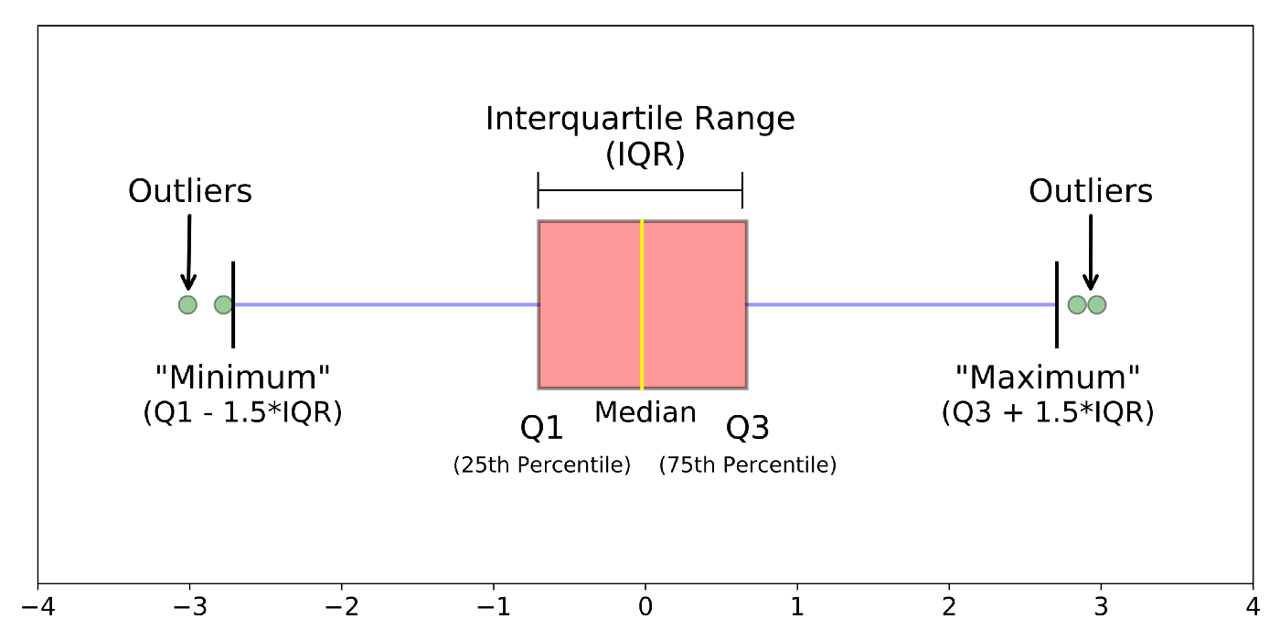

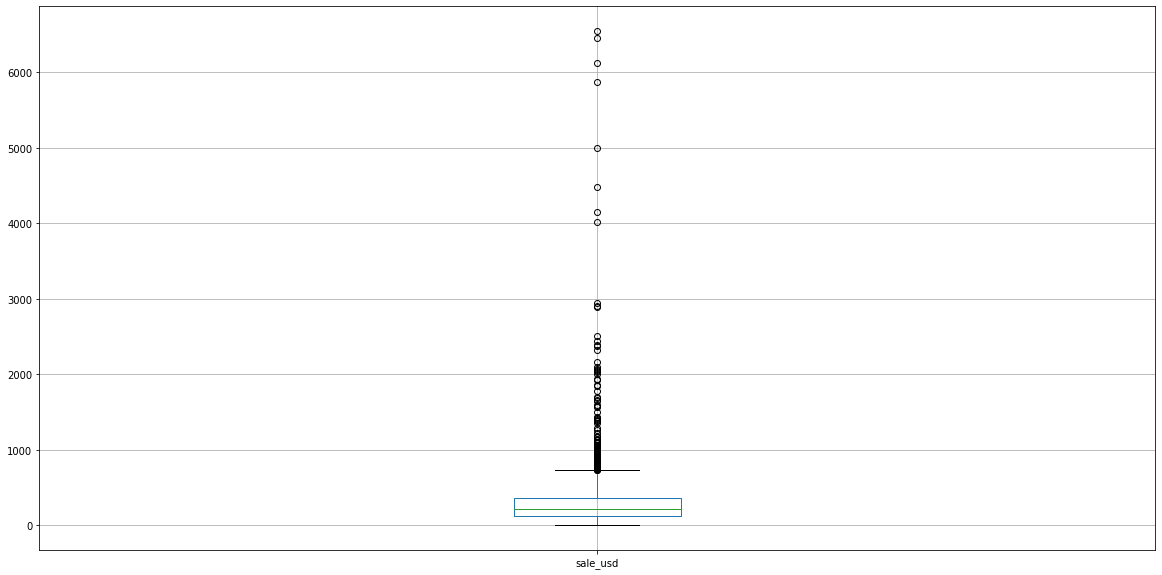

In [ ]:
plt.figure(figsize=(20,10))
df_descriptive.boxplot(column=['sale_usd'])

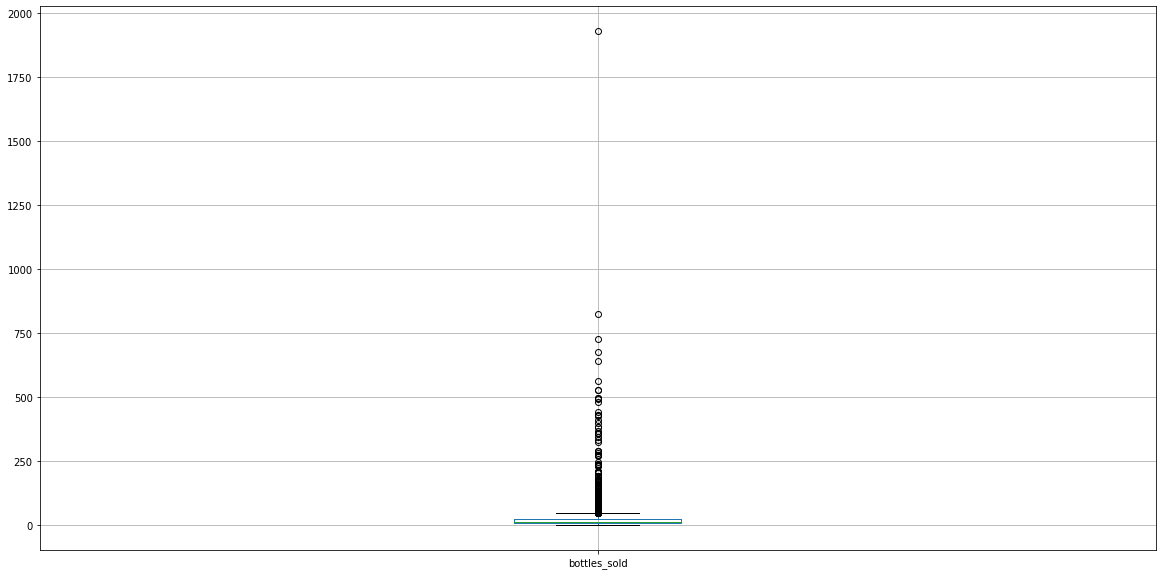

In [ ]:
plt.figure(figsize=(20,10))
df_descriptive.boxplot(column=['bottles_sold'])

In [ ]:
# REvisando como se comportan los percentiles
df_descriptive.describe(percentiles = [0.2, 0.4, 0.6, 0.8])

,sale_usd,bottles_sold
count,2109.000000,2109.000000
mean,314.477528,28.941670
std,436.416083,74.094138
min,0.000000,0.000000
20%,107.932075,6.000000
40%,174.487103,10.585185
50%,211.500000,12.023529
60%,256.318582,15.114118
80%,420.272000,26.611111
max,6544.087911,1930.262222


In [ ]:
# Intentando contar cuantos tienen 
# np.linspace(1, len(df_descriptive), 5, dtype = np.int64) 

In [ ]:
#Removing Outliers
import numpy as np
#Obteniendo los percentiles 1 y 3
q1, q3 = np.percentile(df_descriptive['bottles_sold'],[25,75],axis=0)
#OBteniendo rango intercuantil
iqr = q3 - q1
#mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor.
#Mediana de nuestro dataset
#mediana mitad lower
#mediana  mitad upper
#Creamos nuestros limites de Outliers que son 3 veces nuestro rango intercuantil
#Esto nos ayuda a quitar todos aquellos que esten arriba de upper y debajo de
#lower
upper = q3+(3*iqr)
lower = q3-(3*iqr)
print(df_descriptive[df_descriptive['sale_usd']<upper])

                                         sale_usd  bottles_sold
item_description                                               
1800 Anejo                             163.789744      4.871795
1800 Coconut                           167.161250      7.208333
1800 Reposado                          433.691020     19.857143
1800 Silver                            537.561538     25.418803
1800 Silver Mini                        87.018750      2.625000
...                                           ...           ...
Zaya Gran Reserva Rum                  191.725714      9.142857
Zaya Gran Reserva Rum w/Ice Ball Tray  129.315000      6.166667
Ziyad White Rye DISCO                   60.000000      2.500000
Zyr Vodka                              270.000000     12.000000
maDIKwe                                417.360000     24.000000

[2008 rows x 2 columns]


In [ ]:
#Limpiamos nuestro dataset de todos aquellos que tienen ventas inferiores anuestro IQR
df_descriptive_clean = df_descriptive.loc[df_descriptive['sale_usd']<upper].copy()
df_descriptive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 1800 Anejo to maDIKwe
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_usd      2008 non-null   float64
 1   bottles_sold  2008 non-null   float64
dtypes: float64(2)
memory usage: 47.1+ KB


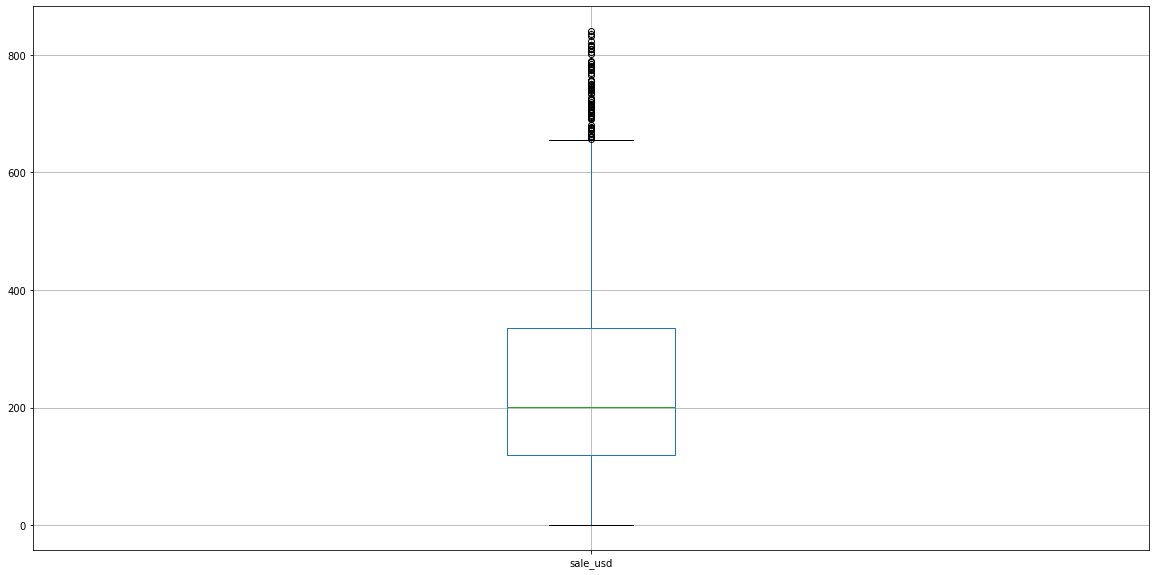

In [ ]:
# Graficamos para ver los outliers como se ven
plt.figure(figsize=(20,10))
df_descriptive_clean.boxplot(column=['sale_usd'])

In [ ]:
# Vemos descriptivos igual por si queremos moverle algo.
df_descriptive_clean.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
sale_usd,2008.0,247.03,171.99,0.0,120.00,200.48,334.57,840.3
bottles_sold,2008.0,22.17,46.40,0.0,6.67,12.00,20.76,678.0


In [ ]:
# Quitamos indice
df_descriptive_clean = df_descriptive_clean.reset_index()

In [ ]:

df_descriptive_clean.head()

,item_description,sale_usd,bottles_sold
0,1800 Anejo,163.789744,4.871795
1,1800 Coconut,167.161250,7.208333
2,1800 Reposado,433.691020,19.857143
3,1800 Silver,537.561538,25.418803
4,1800 Silver Mini,87.018750,2.625000


In [ ]:
#Sumamos los campos, es para agregar totales por así decirlo
df_descriptive_clean[df_descriptive_clean['item_description'].str.contains('Anejo')].groupby('item_description')[['sale_usd','bottles_sold']].sum()

,sale_usd,bottles_sold
item_description,,
1800 Anejo,163.789744,4.871795
1921 Tequila Anejo,225.000000,5.000000
Avion Anejo,183.200000,4.444444
Avion Extra Anejo w/Waterford Glasses,179.910000,1.500000
Bacardi Anejo Cuatro,209.860000,14.000000
Brugal Anejo Rum,270.540000,18.000000
Cabo Wabo Anejo,199.218750,5.312500
Casamigos Anejo,366.420000,7.880000
Cazadores Anejo,130.576923,3.730769


In [ ]:
#Aquí obtenemos diferentes calculos para diferentes columnas agrupadas por un campo
#funciona mucho para una vista general de que tenemos y comparar resultads
df_descriptive_clean[df_descriptive_clean['item_description'].str.contains('Anejo')].groupby('item_description').agg({'sale_usd':'sum','bottles_sold':'mean'}).sort_values('sale_usd', ascending=False) #--->si queremos ordenar

,sale_usd,bottles_sold
item_description,,
Tequila Ocho Anejo,459.000000,9.000000
Mucha Liga Anejo Tequila,450.000000,12.000000
Number Juan Extra Anejo,432.000000,6.000000
Corazon Anejo,428.684211,24.736842
SOOH Gran Centenario Anejo,413.640000,9.000000
Don Q Gran Anejo,405.000000,9.000000
Casamigos Anejo,366.420000,7.880000
Patron Anejo,343.482353,9.858824
Havana Club Anejo Blanco,303.750000,20.250000
